In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Introduction
신경망이라는 것은 기본적으로 input data의 행렬에 적용되는 연산의 나열이다. 이런 연산은 보통은 덧셈과 곱셈의 모음에 비선형 함수의 적용과 같다.<br> 한 예로 logistic regression은 sigmoid 함수가 적용된 경사항의 합인 것이다. <br>
신경망은 각 연산들과 비선형 함수(절대값, maximum, minimum 등)들을 조합함으로써 이런 조각들을 더 일반화한 것이다.

중요한 신경망의 기술은 back propagation(역전파)라고 불리는 것이다. 역전파는 모델 variable들을 학습률과 loss 함수의 결과를 토대로 업데이트하는 절차이다. 이미 chapter 3,4에서 역전파를 사용한 바가 있다.

또 다른 중요한 특징은 비선형 함수의 사용에 관한 것이다. 신경망은 더하기와 곱하기 연산의 조합이기 때문에 비선형 데이터 세트에 대해서는 적용되기 어렵다. 이런 점을 해결하기 위해 비선형 함수를 신경망에 사용함으로써 대부분의 비선형적인 상황에 신경망을 적용할 수 있게 만들어준다.

또 중요하게 기억해야할 것은 다른 알고리즘들과 마찬가지로 신경망은 하이퍼파라미터 선택에 민감하다는 것이다. <br>
이번 장을 통해 learning rate, loss functions, optimization procedures에 대해 알아보도록 한다.

# Implementing operational gates
$f(x) = a{\cdot}x$<br>
이러한 게이트를 최적화하기 위해 input a를 variable로, input x를 placeholder로써 선언한다. 이것이 의미하는 바는 텐서플로우가 a 값을 변화시키기 위해 노력하고, x 값은 변화시키지 않는다는 것이다. loss 함수는 output과 target value(=50)의 차이가 되도록 만든다.

$f(x) = a{\cdot}x +b$<br>
마찬가지로 a와 b를 variable로, x를 placeholder로 선언한다. output은 50이라는 값을 가진 target value쪽으로 최적화되도록 한다. 두 번째 예에서 흥미로훈 것은 solution이 하나가 아니라는 것이다. 변수들의 매우 많은 조합들이 output의 값을 50이 되도록 허용한다. 

신경망에서 중간값을 지니는 model variable들을 고려하지 않고, 대신 원하는 output에 중점을 두도록 한다.

In [2]:
# f(x) = a*x

# 1. 2.
sess = tf.Session()
a = tf.Variable(tf.constant(4.))
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)
y_target = 50.

# 3.
multiplication = tf.multiply(a,x_data)

# 4.
loss = tf.square(tf.subtract(multiplication,y_target))

# 5. 
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

# 6.
for i in range(10):
    sess.run(train_step,feed_dict={x_data:x_val})
    a_val = sess.run(a)
    mult_output = sess.run(multiplication,feed_dict = {x_data:x_val})
    print('{} * {} = {}'.format(a_val,x_val,mult_output))

7.0 * 5.0 = 35.0
8.5 * 5.0 = 42.5
9.25 * 5.0 = 46.25
9.625 * 5.0 = 48.125
9.8125 * 5.0 = 49.0625
9.90625 * 5.0 = 49.53125
9.953125 * 5.0 = 49.765625
9.9765625 * 5.0 = 49.8828125
9.98828125 * 5.0 = 49.94140625
9.994140625 * 5.0 = 49.970703125


In [4]:
# f(x) = a*x + b

#
a = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))
x_val = 5.
x_data = tf.placeholder(dtype = tf.float32)
y_target = 50.
two_gate = tf.add(tf.multiply(a,x_data),b)

loss = tf.square(tf.subtract(two_gate,y_target))

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(10):
    sess.run(train_step,feed_dict={x_data:x_val})
    a_val = sess.run(a)
    b_val = sess.run(b)
    mult_output = sess.run(two_gate,feed_dict = {x_data:x_val})
    print('{} * {} + {} = {}'.format(a_val,x_val,b_val,mult_output))

5.400000095367432 * 5.0 + 1.8799999952316284 = 28.8799991607666
7.51200008392334 * 5.0 + 2.3024001121520996 = 39.86240005493164
8.52575969696045 * 5.0 + 2.5051522254943848 = 45.13395309448242
9.012364387512207 * 5.0 + 2.602473258972168 = 47.6642951965332
9.24593448638916 * 5.0 + 2.6491873264312744 = 48.87886047363281
9.358048439025879 * 5.0 + 2.671610116958618 = 49.46185302734375
9.411863327026367 * 5.0 + 2.682373046875 = 49.74169158935547
9.437694549560547 * 5.0 + 2.6875391006469727 = 49.87601089477539
9.450093269348145 * 5.0 + 2.690018892288208 = 49.94048309326172
9.456045150756836 * 5.0 + 2.691209316253662 = 49.971435546875


중요한 것은 두 번째 예시의 솔루션은 유니크하지 않다는 것이다. 신경망에서는 그것이 별로 중요하지 않다. 그저 모든 파라미터들이 loss를 줄이는데에 초점을 두고 있다. 최종적인 솔루션 a,b는 초기값이 뭐였는지에 초점을 두고 있다. 만일 두 value가 1이 아닌 다른 값으로 초기화 되었다면 각 반복마다 다른 모델 variable들을 보았을 것이다.

이런 과정은 텐서플로우의 역전파 과정을 통해 이루어진다. 텐서플로우는 모델의 연산과 variable 값을 추적하고 (최적화 알고리즘 특징과 loss 함수의 output 관점에서) 조정을 만들어낸다.

이런 것을 조금 더 확장시킬 수 있는데 어떤 input은 variable이고 어떤 input은 data일 경우이다. 중요한 것은 텐서플로우가 loss을 최적화하기 위해 variable로 선언된 것은 수정해나가지만 placeholder로 선언된 data는 수정하지 않는다는 것이다.

연산 그래프를 추적하고 매 스텝마다 모델 variable을 자동으로 업데이트하는 내장된 능력은 텐서플로우의 가장 강력하고 훌륭한 특성이다. 

# Working with gates and activation functions
다른 연산 게이트를 연결해보도록 하자. 이런 연결은 activation 함수를 통해 이뤄질 것이다.

$sigmoid(x) = \sigma(x) = {1 \over {1+e^{x}}}$<br>
$ReLU(x) = max(0,x)$

loss 함수는 L2 norm을 사용하고 타겟 값은 0.75를 사용할 것이다. batch data는 평균 2, 표준편차가 0.1인 정규분포에서 추출된 것을 사용할 것이다.

In [32]:
# 1.
tf.set_random_seed(5)
np.random.seed(42)
sess  = tf.Session()

# 2.
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))

x = np.random.normal(2,0.1,500)
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)

# 3.
sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data,a1),b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data,a2),b2))

# 4.
loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation,0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation,0.75)))

# 5.
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

In [33]:
# 6.
init = tf.global_variables_initializer()
sess.run(init)

loss_vec_sigmoid=[]
loss_vec_relu=[]
activation_sigmoid=[]
activation_relu=[]

for i in range(750):
    rand_indices = np.random.choice(len(x),size=batch_size)
    x_vals = x[rand_indices].reshape(-1,1)
    sess.run(train_step_sigmoid,feed_dict={x_data:x_vals})
    sess.run(train_step_relu,feed_dict={x_data:x_vals})
    
    loss_vec_sigmoid.append(sess.run(loss1,feed_dict={x_data:x_vals}))
    loss_vec_relu.append(sess.run(loss2,feed_dict={x_data:x_vals}))
    
    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation,feed_dict={x_data:x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation,feed_dict={x_data:x_vals})))

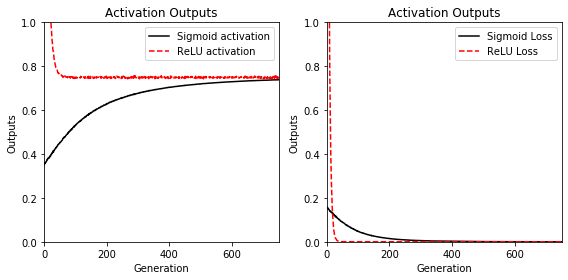

In [35]:
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(activation_sigmoid,'k-',label='Sigmoid activation')
ax[0].plot(activation_relu,'r--',label='ReLU activation')


ax[1].plot(loss_vec_sigmoid,'k-',label='Sigmoid Loss')
ax[1].plot(loss_vec_relu,'r--',label='ReLU Loss')

for axes in ax:
    axes.set_xlim([0,750])
    axes.set_ylim([0,1.0])
    axes.set_title('Activation Outputs')
    axes.set_xlabel('Generation')
    axes.set_ylabel('Outputs')
    axes.legend(loc='upper right')
    
plt.tight_layout()

relu 활성화 함수의 모양을 보면 sigmoid 함수보다도 더 zero value를 돌려낸다. 이런 타입의 행동을 sparsity라고 여긴다. 이런 sparsity는 수렴의 속도가 빨라지는 결과를 만들지만 그래디언트 조정을 상실한 결과를 만든다.

반면에 sigmoid 활성화 함수는 매우 잘 통제된 그래디언트를 가지면서도 ReLU 함수만큼 extreme한 값을 가질 위험을 감수하지 않는다.

대부분의 활성화 함수는 relu와 비슷한 형태를 갖거나 (ex)softplus,Leaky ReLU 등) sigmoid 함수와 비슷한 형태를 갖는다(ex)tanh,heavyside step, arctangent 등). 어찌되었든 활성화 함수의 선택은 신경망의 수렴과 output에 큰 영향을 미친다는 것을 아는게 중요하다.

# Implementing a one-layer neural network
iris 데이터셋을 가지고 신경망을 구성해보도록 한다.

하나의 은닉층을 만들어 볼 것인데 이 은닉층은 fully connected neural network가 행렬 연산에 기초를 두고 있다는 사실을 이해하는데 중요하다. 마찬가지로 데이터의 차원과 행렬이 올바로 정렬되는 것 역시 중요하다.

다음은 회귀 문제이므로 mse를 loss 함수로 사용하도록 한다.

In [85]:
# 1.
from sklearn.datasets import load_iris

# 2 .
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [86]:
# 4.
from sklearn.model_selection import train_test_split
x_vals_train,x_vals_test,y_vals_train,y_vals_test = train_test_split(iris_df.iloc[:,0:3],iris_df.iloc[:,3],test_size=0.8)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_vals_train = scaler.fit_transform(x_vals_train)
x_vals_test = scaler.transform(x_vals_test)

In [87]:
# 5.
batch_size = 50
x_data = tf.placeholder(shape=[None,3],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [88]:
# 6. 중요한 것은 hidden layer에 대해 적절한 모양으로 모델 variable을 선언하는 것이다.
# 은닉층의 사이즈는 원하는 어떤 모양이든 될 수 있고, 5개의 노드를 가진 은닉층을 만들기로 한다.

hidden_layer_nodes = 5
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes])) #->shape:[None,hidden_layer_nodes]으로 만든다.
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

In [89]:
# 7. 모델을 두 step으로 선언. 첫 번째 스텝은 은닉층을 만들어내고, 두 번째 스텝은 출력층(final_output)을 만들어낸다.
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data,A1),b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output,A2),b2))

# 8. 
loss  = tf.reduce_mean(tf.square(y_target - final_output))

# 9.
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

In [90]:
# 10.
init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
test_loss = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train),size=batch_size)
    rand_x = x_vals_train[rand_index].reshape(-1,3)
    rand_y = y_vals_train.values[rand_index].reshape(-1,1)
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    
    temp_loss = sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss,feed_dict = {x_data:x_vals_test.reshape(-1,3),y_target:y_vals_test.values.reshape(-1,1)})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation : {}, Loss = {} '.format(i+1,temp_loss))

Generation : 50, Loss = 0.7637465000152588 
Generation : 100, Loss = 0.5152580142021179 
Generation : 150, Loss = 0.342691034078598 
Generation : 200, Loss = 0.18745914101600647 
Generation : 250, Loss = 0.1859291046857834 
Generation : 300, Loss = 0.12277150899171829 
Generation : 350, Loss = 0.1194532960653305 
Generation : 400, Loss = 0.13153590261936188 
Generation : 450, Loss = 0.0807112529873848 
Generation : 500, Loss = 0.07261840999126434 


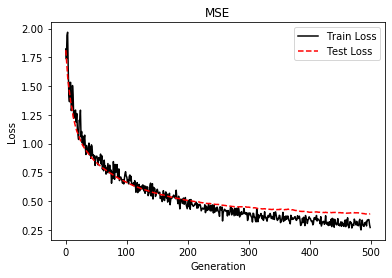

In [91]:
plt.plot(loss_vec,'k-',label='Train Loss')
plt.plot(test_loss,'r--',label='Test Loss')
plt.title('MSE')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')

입력층(3개) -> 은닉층(5개) : 15 weights + 5 biases<br>
은닉층(5개) -> 출력층(1개) : 5 weights + 1 bias<br>
-> 26 variables

train data와 test data의 loss를 보건대 모델이 언제 과대적합을 시작하는지 확인할 수 있다.<br>
또 확인할 수 있는 것은 train set loss는 test set loss만큼이나 부드럽지는 않다는 것이다. 여기에는 두 가지 이유가 있다.
1. 우리는 test set보다 작은 크기의 배치를 사용하고 있다.
2. train set에서 학습 중에 있으며 test set은 모델 variables에 영향을 미치지 않는다는 것이다.

# Implementing different layers
어떨게 다른 층(layer)을 구현하는지 아는 것은 매우 중요한 문제이다. 이전 recipe에서 완전 연결 층을 구현하는 것을 살펴보았는데 텐서플로우에는 좀 더 다양한 타입의 layer에 대해 구현된 내장함수들이 많다. 가장 인기있는 층은 convolutional layer와 maxpool layer이다. 어떻게 input 데이터와 완전 연결된 데이터와 함께 구현하는지 살펴보도록 한다.

우선은 이러한 층등이 1차원 데이터에 어떻게 적용되는지, 그리고 2차원 데이터에는 어떻게 적용되는지 살피도록 한다.

신경망은 어떤 모양으로든 layered될 수 있는반면 가장 일반적인 사용방법 중 하나는 convolutional layer와 fully-connected layer(완전연결층)을 사용하여 먼저 feature를 만드는 것이다. 만일 너무 많은 feature가 있다면 maxpool layer를 사용하는 것이 일반적이다. 이러한 layer를 사용한 후 비선형 층을 쓰는데 흔히 활성화 함수로써 소개된다. Convolutional neural networks(CNNs)를 사용한다는 것은 일반저긍로 convoutional, maxpool, activation,convolutional, maxpool, activation form을 갖는다는 것이다.


In [50]:
# 1차원 데이터

# 1. 2. data의 random array를 생성
data_size = 25
data_1d = np.random.normal(size=data_size)
x_input_1d = tf.placeholder(dtype=tf.float32,shape=[data_size])

(아래 함수에 대한 상술)<br>
텐서플로우의 layer 함수는 4D data를 다루기 위해 고안되었다. (4D = \[batch_size,width,height,channels\])<br>
차원을 확장(extend)하거나 필요한 경우 감소(collapse)시키기 위해 input data와 output를 수정할 필요가 있다.<br>
우리 데이터의 경우 batch_size=1, width=1, height=25, channel_size=1를 갖는다. 

차원을 확장(expand)하기 위해서는 expand_dims() 함수를 사용하고, 차원을 감소(collapse)시키기 위해서는 squeeze() 함수를 사용하도록 한다. convolutional layer의 output은 $output\_size = {(W-F+2P) \over {S+1}}$로 계산된다. W는 input_size, F는 filter size, P는 padding size, S는 stride size이다.

In [51]:
# 3. convolutional layer를 만드는 함수를 정의
def conv_layer_1d(input_1d, my_filter):
    # Make 1d input into 4d
    input_2d = tf.expand_dims(input_1d,0)
    input_3d = tf.expand_dims(input_2d,0)
    input_4d = tf.expand_dims(input_3d,3)
    # Perform convolution
    convolution_output = tf.nn.conv2d(input_4d,filter=my_filter,strides=[1,1,1,1],padding='VALID')
    # Now drop extra dimensions
    conv_output_1d = tf.squeeze(convolution_output)
    return (conv_output_1d)

my_filter = tf.Variable(tf.random_normal(shape=[1,5,1,1]))
my_convolution_output = conv_layer_1d(x_input_1d, my_filter)

In [52]:
# 4. 텐서플로우의 activation 함수는 element_wise하게 작동하는 것이 default이다.
# 이것이 의미하는 것은 관심 layer에서 활성화 함수를 호출해야함을 의미한다.
def activation(input_1d):
    return tf.nn.relu(input_1d)
my_activation_output = activation(my_convolution_output)

In [53]:
# 5. maxpool layer함수를 선언. maxpool : moving window across out one-dimensional vector
# 이 example을 위해 width를 5로 가지도록 초기화하도록 한다.

# maxpool 인수가 filter를 가지지는 못하지만 그외에는 convolutional layer와 비슷하게 size, stride, padding option을 가지고 있다.
# 5 width의 유효한 padding의 window를 가지고 있으므로 output array는 4개 가량 적은 entry를 가지고 있다.

def max_pool(input_1d,width):
    # 1d input을 4d로 만든다.
    input_2d = tf.expand_dims(input_1d,0)
    input_3d = tf.expand_dims(input_2d,0)
    input_4d = tf.expand_dims(input_3d,3)
    # Perform the max pool operation
    pool_output = tf.nn.max_pool(input_4d,ksize=[1,1,width,1],strides=[1,1,1,1],padding='VALID')
    pool_output_1d = tf.squeeze(pool_output)
    return pool_output_1d

my_maxpool_output = max_pool(my_activation_output,width=5)

In [54]:
# 6. 연결할 마지막 층은 완전 연결층이다. 여기서 1d array를 넣고 나타내는 value들의 숫자를 출력하는 함수를 만들기로 한다.
# 1d array로 행렬 곱을 하기 위해서는 2d로 차원을 확장해야한다.

def fully_connected(input_layer,num_outputs):
    # Create weights
    weight_shape = tf.squeeze(tf.stack([tf.shape(input_layer),[num_outputs]]))
    weight = tf.random_normal(weight_shape,stddev=0.1)
    bias = tf.random_normal(shape=[num_outputs])
    # Make input into 2d
    input_layer_2d = tf.expand_dims(input_layer,0)
    # Perform fully connected operations
    full_output = tf.add(tf.matmul(input_layer_2d,weight),bias)
    # Drop extra dimensions
    full_output_1d = tf.squeeze(full_output)
    return full_output_1d

my_full_output = fully_connected(my_maxpool_output,5)

In [55]:
# 7.
init = tf.global_variables_initializer()
sess.run(init)
feeddict = {x_input_1d:data_1d}
# Convolution Output
print('Input = array of length 25, \n Convolution w/filter, length = 5, stride size = 1, results in an array of length 21:')
print(sess.run(my_convolution_output,feed_dict = feeddict))
# Activation Output
print('\nInput = the above array of length 21, \nRelu element wise returns the array of length 21:')
print(sess.run(my_activation_output,feed_dict = feeddict))
# Maxpool Output
print('\nInput = the above array of length 21')
print('MaxPool, window length = 5, stride size = 1, results in the array of length 17:')
print(sess.run(my_maxpool_output,feed_dict=feeddict))
# Fully Connected Output
print('\nInput = the above array of length 17')
print('Fully connected layer on all four rows with five outputs:')
print(sess.run(my_full_output,feed_dict=feeddict))


Input = array of length 25, 
 Convolution w/filter, length = 5, stride size = 1, results in an array of length 21:
[ 2.1260946  -1.2378231  -2.456676   -1.1459155   1.3697324   0.14272945
 -0.50754696  0.8518854   2.0475147  -2.7864265   2.8696089  -1.56621
  1.7251074  -1.317322   -0.81745183 -2.4236124   1.3836945  -1.839399
 -1.0876572   1.5594971  -0.317252  ]

Input = the above array of length 21, 
Relu element wise returns the array of length 21:
[ 2.1260946  -0.         -0.         -0.          1.3697324   0.14272945
 -0.          0.8518854   2.0475147  -0.          2.8696089  -0.
  1.7251074  -0.         -0.         -0.          1.3836945  -0.
 -0.          1.5594971  -0.        ]

Input = the above array of length 21
MaxPool, window length = 5, stride size = 1, results in the array of length 17:
[2.1260946 1.3697324 1.3697324 1.3697324 2.0475147 2.0475147 2.8696089
 2.8696089 2.8696089 2.8696089 2.8696089 1.7251074 1.7251074 1.3836945
 1.3836945 1.5594971 1.5594971]

Input = t